In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import sys
sys.path.append('../../')

from fedlab.contrib.dataset.fairscore import FairscoreWine

from fedlab.utils.dataset import FairScorePartitioner
from fedlab.utils.dataset.functional import partition_report

import torch
from torch.utils.data import DataLoader

# Fairscore Wine Dataset

In [2]:

trainset = FairscoreWine(train=True, download=False)
train_loader = DataLoader(trainset, batch_size=20, shuffle=True)
print(f"Train data size: {len(trainset)}")
print(f"Train feature number: {trainset.data.shape[1]}")
print(f"Train class distribution: class0:class1:class2 = "
      f"{len(trainset.targets[trainset.targets==0])}:{len(trainset.targets[trainset.targets==1])}:{len(trainset.targets[trainset.targets==2])}")

current directory /Users/aravila/Documents/INRS-UQO/Research/federated_learning/code/FedLab/tutorials/Datasets-DataPartitioner-tutorials
Local file ../../datasets/fairscore/synthetic.csv loaded.
Train data size: 4547
Train feature number: 6
Train class distribution: class0:class1:class2 = 174:984:3389


In [4]:
testset = FairscoreWine(train=False, download=False)
test_loader = DataLoader(testset, batch_size=20, shuffle=True)
print(f"Train data size: {len(testset)}")
print(f"Train feature number: {testset.data.shape[1]}")
print(f"Train class distribution: class0:class1:class2 = "
      f"{len(testset.targets[testset.targets==0])}:{len(testset.targets[testset.targets==1])}:{len(testset.targets[testset.targets==2])}")

current directory /Users/aravila/Documents/INRS-UQO/Research/federated_learning/code/FedLab/tutorials/Datasets-DataPartitioner-tutorials
Local file ../../datasets/fairscore/synthetic.csv loaded.
Train data size: 1950
Train feature number: 6
Train class distribution: class0:class1:class2 = 72:293:1585


# Fairscore Wine Data Partition

In [5]:
num_clients = 10
num_classes = 3
seed = 2021

col_names = [f"class-{i}" for i in range(num_classes)]

hist_color = '#4169E1'
plt.rcParams['figure.facecolor'] = 'white'

## Label distribution skew
### Quantity-based

In [6]:
# perform partition
noniid_major_label_part = FairScorePartitioner(trainset.targets, 
                                           num_clients=num_clients,
                                           partition="noniid-#label", 
                                           major_classes_num=1,
                                           seed=seed)

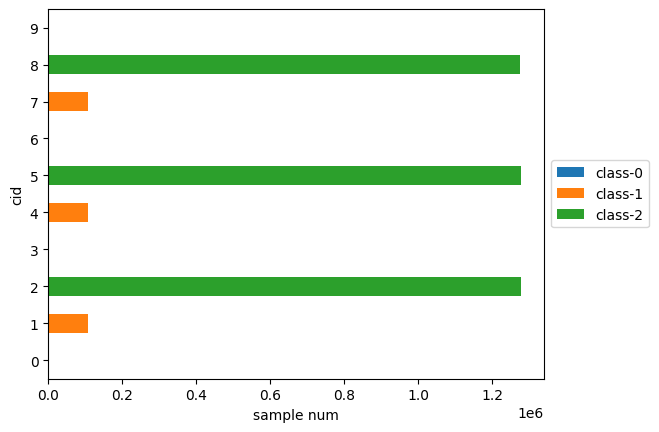

In [7]:
# generate partition report
csv_file = "./partition-reports/fairscore_wine_noniid-label1_10clients.csv"
partition_report(trainset.targets, noniid_major_label_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

noniid_major_label_part_df = pd.read_csv(csv_file)
noniid_major_label_part_df = noniid_major_label_part_df.set_index('cid')
for col in col_names:
    noniid_major_label_part_df[col] = (noniid_major_label_part_df[col] * noniid_major_label_part_df['TotalAmount']).astype(int)

# select first 10 clients for bar plot
noniid_major_label_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/fairscore_wine_noniid-label1_10clients.png", 
            dpi=400, bbox_inches = 'tight')

In [8]:
noniid_major_label_part_df

class-0  class-1  class-2  TotalAmount
cid                                        
0       1936        0        0           44
1          0   107584        0          328
2          0        0  1276900         1130
3       1936        0        0           44
4          0   107584        0          328
5          0        0  1276900         1130
6       1849        0        0           43
7          0   107584        0          328
8          0        0  1274641         1129
9       1849        0        0           43

In [9]:
noniid_major_label_part.client_dict

{0: array([3578, 4222,   46, 3067, 1474,  204, 1664, 1034,  662,  253, 3265,
        1574, 1579, 2920,  831, 2502, 3307, 1702, 2346, 1152,  993, 1245,
        1690, 3050, 3650, 3714,  259, 2388,  526,  873, 4223,  540, 3662,
         115, 1294, 3973, 2400,  230,  178, 2435,  690, 3810,  905, 1430]),
 1: array([ 679, 1359,  889, 3843, 1394, 2838,  442,  579, 2945,  701,  879,
        2809,  238, 3898,  211,  578, 1000, 3993, 1915,  595, 3299, 2298,
          76, 1633, 3118,  930, 1983, 2980, 1495,  686,  845,  891, 3581,
        3672, 3720, 4072,  783, 3311, 3669,  290, 4267, 2618, 2370, 3667,
        3696, 1500,  791, 1989,   94,  473, 4406, 2990, 2890, 2384, 2586,
        2793,  452, 2557, 1219, 2670, 4129,  835,  584,  738,  386,  625,
        3618, 3422, 3277, 1287, 3360, 2612, 3093, 1562, 1283, 3273, 1668,
        2700, 1020, 3996, 1671,  350, 3664, 3303, 3357, 2663,  453, 3305,
          74, 3992, 1854, 3158, 2671,  310, 3293,   51, 2626,   93, 3287,
        3994, 3593, 2600, 4226

### Distributed-based (Dirichlet) 

In [10]:
# perform partition
noniid_labeldir_part = FairScorePartitioner(trainset.targets, 
                                        num_clients=num_clients,
                                        partition="noniid-labeldir", 
                                        dir_alpha=0.5,
                                        seed=seed)

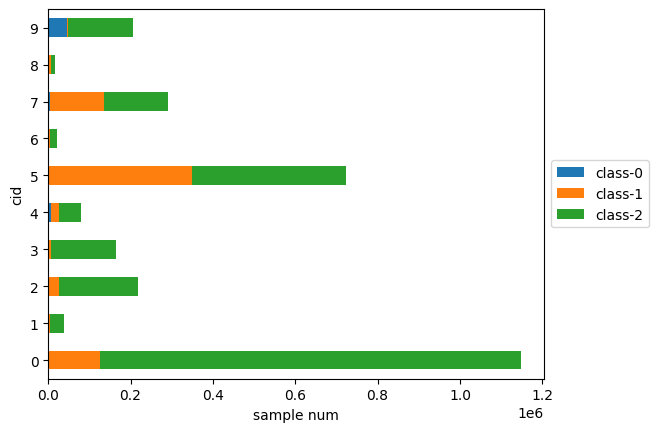

In [11]:
# generate partition report
csv_file = "./partition-reports/fairscore_wine_noniid_labeldir_10clients.csv"
partition_report(trainset.targets, noniid_labeldir_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

noniid_labeldir_part_df = pd.read_csv(csv_file)
noniid_labeldir_part_df = noniid_labeldir_part_df.set_index('cid')
for col in col_names:
    noniid_labeldir_part_df[col] = (noniid_labeldir_part_df[col] * noniid_labeldir_part_df['TotalAmount']).astype(int)

# select first 10 clients for bar plot
noniid_labeldir_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/fairscore_wine_noniid_labeldir_10clients.png", 
            dpi=400, bbox_inches = 'tight')

## Quantity skew (Dirichlet)

In [12]:
# perform partition
unbalance_part = FairScorePartitioner(trainset.targets, 
                                  num_clients=num_clients,
                                  partition="unbalance", 
                                  dir_alpha=0.5,
                                  seed=seed)

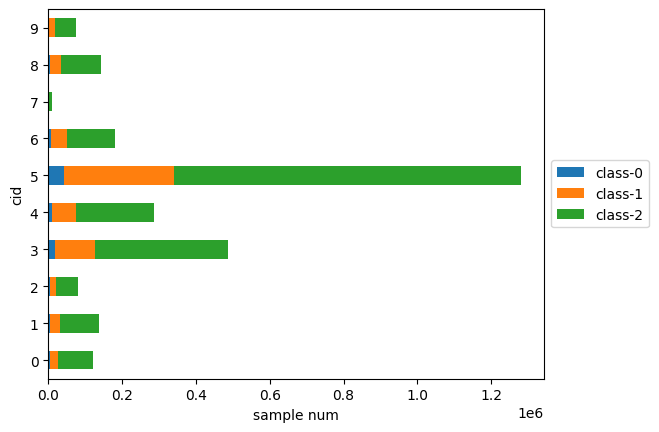

In [13]:
# generate partition report
csv_file = "./partition-reports/fairscore_wine_unbalance_10clients.csv"
partition_report(trainset.targets, unbalance_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

unbalance_part_df = pd.read_csv(csv_file)
unbalance_part_df = unbalance_part_df.set_index('cid')
for col in col_names:
    unbalance_part_df[col] = (unbalance_part_df[col] * unbalance_part_df['TotalAmount']).astype(int)

# select first 10 clients for bar plot
unbalance_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/fairscore_wine_unbalance_10clients.png", 
            dpi=400, bbox_inches = 'tight')

## IID

In [14]:
# perform partition
iid_part = FairScorePartitioner(trainset.targets, 
                            num_clients=num_clients,
                            partition="iid",
                            seed=seed)

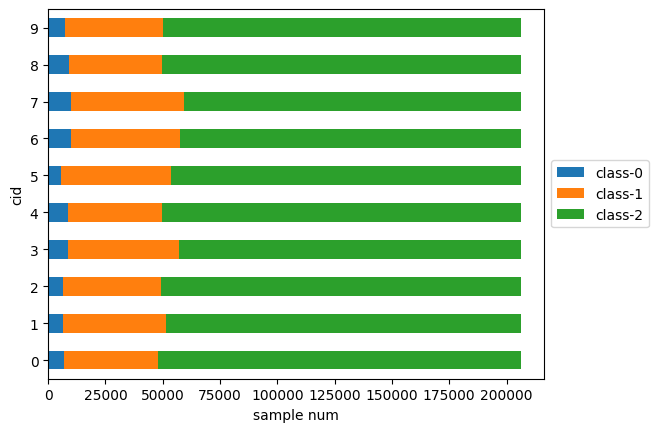

In [15]:
# generate partition report
csv_file = "./partition-reports/fairscore_wine_iid_10clients.csv"
partition_report(trainset.targets, iid_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

iid_part_df = pd.read_csv(csv_file)
iid_part_df = iid_part_df.set_index('cid')
for col in col_names:
    iid_part_df[col] = (iid_part_df[col] * iid_part_df['TotalAmount']).astype(int)

# select first 10 clients for bar plot
iid_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/fairscore_wine_iid_10clients.png", 
            dpi=400, bbox_inches = 'tight')